In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib ipympl

import os, sys

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter, read_from_netcdf
from general_utils.plots import *
from general_utils.parameters import create_population_values, set_options

from empirical.model import *

ImportError: cannot import name 'network' from 'inference.network' (/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/inference/network.py)

In [ ]:
## setting simulation parameters
steps = 100
plot_ax3D = True
save = 0
file_format = "png"
rerun = True
compile = False

In [ ]:
## definining plotting functions
def plot_phase_loc(x, y, handles=None, axes=None):

    if handles:
        for handle in handles:
            handle.set_xdata(np.atleast_1d(x))
            handle.set_ydata(np.atleast_1d(y))

    elif axes:
        handles = []
        for ax in axes:
            (h_tmp,) = ax.plot(
                x, y, "o", color="green", markersize=7, markerfacecolor="none"
            )
            handles.append(h_tmp)

    return handles


def plot_thresholds(alpha_arr, psi_1, psi_2, alpha_1, alpha_2, handles=None, ax=None):

    p_threshold_1 = np.exp(-((alpha_arr - psi_1) ** 2.0) / (2 * alpha_1**2))
    p_threshold_2 = np.exp(-((alpha_arr - psi_2) ** 2.0) / (2 * alpha_2**2))

    if handles:
        h_a1, h_a2, h_a12 = handles

        h_a1.set_ydata(p_threshold_1)
        h_a2.set_ydata(p_threshold_2)
        h_a12.set_ydata(p_threshold_1 + p_threshold_2)
    else:
        (h_a1,) = ax.plot(alpha_arr, p_threshold_1, "k--", label="$\\rho(\\Psi_1)$")
        (h_a2,) = ax.plot(alpha_arr, p_threshold_2, "k-", label="$\\rho(\\Psi_2)$")
        (h_a12,) = ax.plot(
            alpha_arr, p_threshold_1 + p_threshold_2, "r-", label="$\\rho(\\Psi_{1+2})$"
        )
        ax.legend()

    return [h_a1, h_a2, h_a12]


def plot_distributions(
    nu_arr,
    gamma_1,
    gamma_2,
    delta_1,
    delta_2,
    nu_max_1,
    nu_max_2,
    handles=None,
    ax=None,
):
    # print("distr", gamma_1, gamma_2)
    p_nu_1 = p_nu(nu_arr, gamma_1, delta_1, nu_max_1)
    p_nu_2 = p_nu(nu_arr, gamma_2, delta_2, nu_max_2)

    if handles:
        h_p1, h_p2, h_p12 = handles
        h_p1.set_ydata(p_nu_1)
        h_p2.set_ydata(p_nu_2)
        h_p12.set_ydata(p_nu_1 + p_nu_2)

    else:
        (h_p1,) = ax.plot(nu_arr, p_nu_1, "k--", label="$\\rho(\\nu_1)$")
        (h_p2,) = ax.plot(nu_arr, p_nu_2, "k-", label="$\\rho(\\nu_2)$")
        (h_p12,) = ax.plot(nu_arr, p_nu_1 + p_nu_2, "r-", label="$\\rho(\\nu_{1+2})$")
        ax.legend()

    max_val = np.nanmax((p_nu_1 + p_nu_2)[10:])
    print(f"max: {max_val:.2f}")
    plt.setp(ax, ylim=[0, np.nanmax([1.0, max_val * 1.1])])

    return [h_p1, h_p2, h_p12]

In [20]:
nI = 2
nE = 0
options = set_options(nI=nI, nE=nE)
options["simulation"] = {
    "rateWnt": [0, 2],
    # "Psi_0": [-0.0, 0.1],
    "alpha_0": [0, 0.1],
    "sim_prim": [0, -1, 0],
    "sim_sec": [0, 1, 0],
}
options["eps"] = np.sqrt(0.5)
options["eta"] = 0.9
options["rateWnt"] = 1.0
options["Psi_0"] = [0.0, 0.0]
# options['tau_n'] = [1.,0.3,0.3]
options["tau_I"] = 0.005
options["tau_n"] = [0.0]
# options['tau_I'] = 0.005
options["mode_selfcon"] = 1
res = darkMatter(
    steps=steps, options=options, cleanup=False, rerun=True, compile=False, logging=2
)

order = list(options["simulation"].keys())

DM suffix: 
rateWnt [0, 2] <class 'list'>
alpha_0 [0, 0.1] <class 'list'>
sim_prim [0, -1, 0] <class 'list'>
sim_sec [0, 1, 0] <class 'list'>


In [21]:
params = read_from_netcdf(res["filePaths"][0])
# params

interactive(children=(IntSlider(value=70, description='$\\bar{\\nu}\\,$[Hz]'), IntSlider(value=20, description…

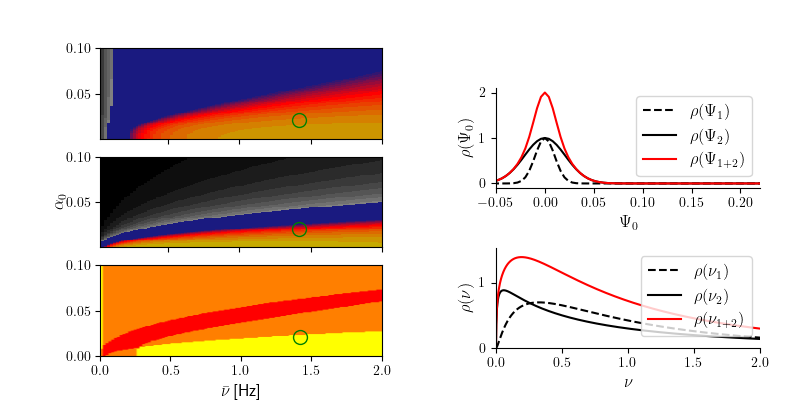

In [22]:
set_plot_params()

fig = plt.figure(figsize=(8, 4))

# fig,ax = plt.subplots(2,2,figsize=(7.5,5),dpi=100)
plt_para = {"ax_label": [], "const_label": []}

## prepare axes of subplots
big_ax = fig.add_subplot(121)

# ax_phase_nu = fig.add_subplot(321)
ax_phase1 = fig.add_subplot(321)
ax_phase2 = fig.add_subplot(323)

# ax_threshold = fig.add_axes([0.6, 0.6, 0.35, 0.3])
ax_threshold = fig.add_subplot(222)
ax_threshold.set_position([0.62, 0.53, 0.33, 0.25])
# ax_firingrate = fig.add_axes([0.6, 0.125, 0.35, 0.3])
ax_firingrate = fig.add_subplot(224)
# Change ax_firingrate position and size
# [left, bottom, width, height] in figure coordinates (0 to 1)
ax_firingrate.set_position([0.62, 0.13, 0.33, 0.25])

ax_phase_transitions = fig.add_subplot(325)

plt.setp(ax_threshold, xlabel="$\\Psi_0$", ylabel="$\\rho(\\Psi_0)$")
plt.setp(
    ax_firingrate,
    xlabel="$\\nu$",
    ylabel="$\\rho(\\nu)$",
    # xlim=[0, 3 * options["rateWnt"]],
)
ax_threshold.spines[["top", "right"]].set_visible(False)
ax_threshold.set_xlim([-0.1, 0.2])
ax_firingrate.spines[["top", "right"]].set_visible(False)

plt.setp(ax_firingrate, xlim=[0, 3], ylim=[0, 1])

# x=70; y=40
x = 70
y = 20

nu_1 = get_nu_bar(res["gamma"][0, ...], res["delta"][0, ...], res["rate_max"][0, ...])
# for i in range(0,steps):
#    col = [1-(i+1)/steps]*3
#    ax_phase_nu.plot(res['Psi_0'],nu_1[i,:],'-',color=col)

# ax[1][0].plot(res['alpha_0'],nu_2,'k-')
para = {
    "rateWnt": params["rateWnt"],
    "alpha_0": params["alpha_0"],
    "Psi_0": params["Psi_0"],
}

# print(order)
if "rateWnt" in order[:2]:
    para["rateWnt"] = np.tile(res["rateWnt"], (2, 1))
# rates = options['rateWnt']

# h_im1 = ax_phase_nu.imshow(
#     para["rateWnt"][0] - nu_1,
#     origin="lower",
#     vmin=-np.max(para["rateWnt"]),
#     vmax=np.max(para["rateWnt"]),
#     cmap="seismic",
#     extent=[res[order[0]][0], res[order[0]][-1], res[order[1]][0], res[order[1]][-1]],
#     aspect="auto",
# )
# ax_cb = fig.colorbar(h_im1, ax=ax_phase_nu, location="top", anchor=(0, 0.5), shrink=1.0)
# plt.setp(ax_cb.ax.get_xaxis(),label='$\\delta\\nu$')
# ax_cb.set_label("$\\delta\\nu$")

for p, axx in enumerate([ax_phase1, ax_phase2]):
    plot_fins(
        axx,
        res[order[0]],
        res[order[1]],
        res["gamma"][-2 + p, ...],
        res["chi"][-2 + p, ...],
        res["regions"][-2 + p, ...],
        plt_para,
    )


alpha_arr = np.linspace(-0.1, 0.3, 101)
nu_arr = np.linspace(1 / 10000, 20, 10000)

plt.setp(big_ax, xlabel=get_displayString(order[0]), ylabel=get_displayString(order[1]))
big_ax.set_facecolor("none")
big_ax.tick_params(labelcolor="none", top=False, bottom=False, left=False, right=False)
big_ax.spines[["top", "right", "bottom", "left"]].set_visible(False)

x_widget = widgets.IntSlider(
    x,
    min=0,
    max=steps,
    orientation="horizontal",
    description=get_displayString(order[0]),
)
y_widget = widgets.IntSlider(
    y,
    min=0,
    max=steps,
    orientation="horizontal",
    description=get_displayString(order[1]),
)

global h_loc, h_thresholds, h_distributions
h_loc = None
h_thresholds = None
h_distributions = None


def update_plot(x, y):

    if options["simulation"]["sim_prim"][1] == -1:
        params[order[0]][:] = res[order[0]][x]
    else:
        # print(options["simulation"])
        params[order[0]][options["simulation"]["sim_prim"][1]] = res[order[0]][x]

    if options["simulation"]["sim_sec"][1] == -1:
        params[order[1]][:] = res[order[1]][y]
    else:
        params[order[1]][options["simulation"]["sim_sec"][1]] = res[order[1]][y]

    global h_loc, h_thresholds, h_distributions

    h_loc = plot_phase_loc(
        res[order[0]][x],
        res[order[1]][y],
        h_loc,
        # [ax_phase_nu, ax_phase1, ax_phase2, ax_phase_transitions],
        [ax_phase1, ax_phase2, ax_phase_transitions],
    )

    h_thresholds = plot_thresholds(
        alpha_arr,
        params["Psi_0"][-2],
        params["Psi_0"][-1],
        params["alpha_0"][-2],
        params["alpha_0"][-1],
        h_thresholds,
        ax_threshold,
    )

    gamma_1 = res["gamma"][-2, y, x]
    gamma_2 = res["gamma"][-1, y, x]
    delta_1 = res["delta"][-2, y, x]
    delta_2 = res["delta"][-1, y, x]
    nu_max_1 = res["rate_max"][-2, y, x]
    nu_max_2 = res["rate_max"][-1, y, x]

    print(f"{gamma_1=:.2f}, {gamma_2=:.2f}, {delta_1=:.2f}, {delta_2=:.2f}")

    h_distributions = plot_distributions(
        nu_arr,
        gamma_1,
        gamma_2,
        delta_1,
        delta_2,
        nu_max_1,
        nu_max_2,
        h_distributions,
        ax_firingrate,
    )
    fig.canvas.draw_idle()


is_dark = np.logical_or(res["chi"] > 2, res["gamma"] < 1)
# is_dark = np.logical_or(res["chi"] > 2)

ax_phase_transitions.imshow(
    is_dark.sum(axis=0),
    origin="lower",
    aspect="auto",
    extent=[
        options["simulation"][order[0]][0],
        options["simulation"][order[0]][1],
        options["simulation"][order[1]][0],
        options["simulation"][order[1]][1],
    ],
    cmap="autumn_r",
)


# # ax_phase_transitions.imshow(has_pole[1,...],origin='lower')#,cmap='seismic',)
# ax_phase_transitions.imshow(is_dark[0, ...], origin="lower")  # ,cmap='seismic',)

# # idx_transition = np.max(np.where(is_dark), axis=1)
# idx = np.diff(is_dark.astype("int"), axis=1)
# for i in range(2):
# 	idx_transition = np.where(idx[i,...])

# 	ax_phase_transitions.plot(
# 		idx_transition[1],
# 		idx_transition[0],
# 		color='r'
# 	)

# if save:
#    sv_name = './figures/two_pop_n.%s' % (file_format)
#    plt.savefig(sv_name,format=file_format,dpi=600)
#    print('Figure saved as "%s"' % sv_name)

plt.setp(ax_phase1, xticklabels=[])
plt.setp(ax_phase2, xticklabels=[])

plt.setp(ax_threshold, xlim=[-0.05, 0.22])
plt.setp(ax_firingrate, xlim=[0, 2], ylim=[0, 1.2])
widgets.interactive(update_plot, x=x_widget, y=y_widget)

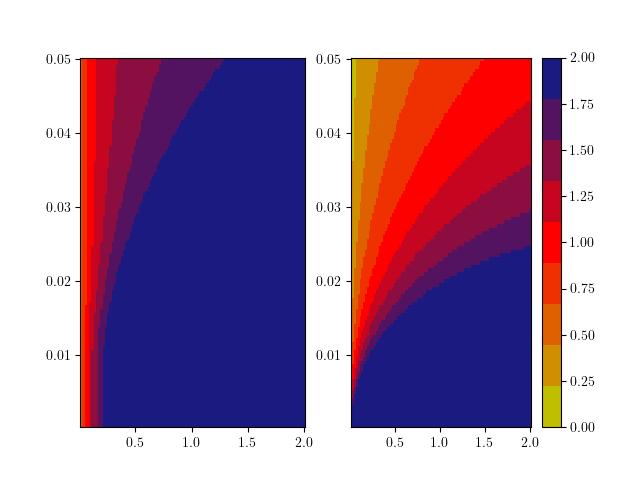

In [ ]:
cmap_heat = mcolors.LinearSegmentedColormap.from_list(
    name="heat", colors=[(0, "y"), (0.5, "r"), (1, (0.1, 0.1, 0.5))], N=10 - 1
)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.pcolormesh(
    res["rateWnt"], res["alpha_0"], res["gamma"][0, ...], cmap=cmap_heat, vmin=0, vmax=2
)

ax = fig.add_subplot(122)
h_phase = ax.pcolormesh(
    res["rateWnt"], res["alpha_0"], res["gamma"][1, ...], cmap=cmap_heat, vmin=0, vmax=2
)
# ax.imshow(res["chi"][1,...])
plt.colorbar(h_phase)
plt.show()

In [30]:
res["rateWnt"]

masked_array(data=[0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18,
                   0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36,
                   0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54,
                   0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72,
                   0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 ,
                   0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
                   1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26,
                   1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44,
                   1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62,
                   1.64, 1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 ,
                   1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96, 1.98,
                   2.  ],
             mask=False,
       fill_value=1e+20)

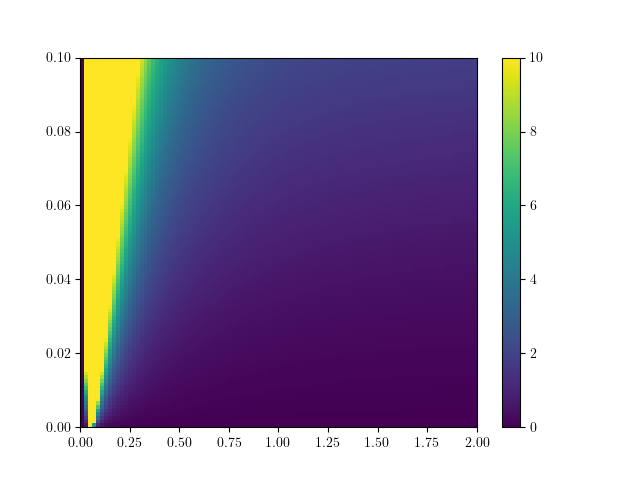

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
h_img = ax.imshow(
    np.squeeze(np.diff(res["chi"], axis=0)),
    origin="lower",
    aspect="auto",
    extent=[
        options["simulation"][order[0]][0],
        options["simulation"][order[0]][1],
        options["simulation"][order[1]][0],
        options["simulation"][order[1]][1],
    ],
    vmin=0,
    vmax=10,
)
plt.colorbar(h_img)

In [8]:
params["alpha_0"]
# res['I_balance'].shape

masked_array(data=[0.01, 0.01],
             mask=False,
       fill_value=1e+20)

[0.022975223315267048 0.04513541626512422 0.06688117912627056 ...
 3.8580817634418274 3.8950285418165156 3.931880300028289]


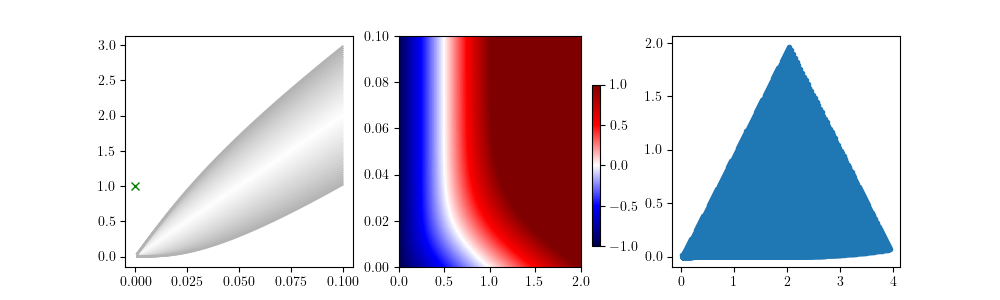

In [9]:
p = 0
nu_1 = get_nu_bar(res["gamma"][0, ...], res["delta"][0, ...], res["rate_max"][0, ...])
nu_2 = get_nu_bar(res["gamma"][1, ...], res["delta"][1, ...], res["rate_max"][1, ...])
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for i in range(0, 30):
    col = [1 - (i + 1) / steps] * 3
    ax[0].plot(res["Psi_0"], nu_2[i, :], "-", color=col)
    ax[0].plot(res["Psi_0"], nu_1[i, :], "-", color=col)

ax[0].plot(0, 1, "gx", markersize=6)

# ax[1][0].plot(res['alpha_0'],nu_2,'k-')
h_im1 = ax[1].imshow(
    nu_1 - options["rateWnt"],
    origin="lower",
    aspect="auto",
    vmin=-options["rateWnt"],
    vmax=options["rateWnt"],
    cmap="seismic",
    extent=tuple(options["simulation"][order[0]])
    + tuple(options["simulation"][order[1]]),
)
fig.colorbar(h_im1, ax=ax[1], location="right", anchor=(0, 0.3), shrink=0.7)

# h_im2 = ax[1][1].imshow(nu_2-5,origin='lower',vmin=-5,vmax=5,cmap='seismic')
# fig.colorbar(h_im2, ax=ax[1][1], location='right', anchor=(0, 0.3), shrink=0.7)
print(nu_1.flatten())
ax[2].scatter(nu_1.flatten(), nu_2.flatten(), marker=".")
plt.show()